Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [394]:
NAME = "Jingren Wang"
COLLABORATORS = "N.A."

---

# CS110 Pre-class Work 5.1

## Question 1.

### Question 1a.

Write the worst sort function in the world, `worst_sort`. This function takes a list, and then randomly shuffles it until it happens to be in sorted order. Once it is in sorted order then the list is returned.


In [395]:
import numpy as np

def worst_sort(A):
    """
    Sort A in ascending order by randomly shuffling its 
    elements until they are in order.
    
    Input:
    - A: list of numerical values
    
    Output:
    - A: Sorted list
    """
    count = 0 
        
    A = list(A)  # cast to list object
    B = list(A) 
    B.sort()
    
    # continue list shuffle until sorted
    while A != B:   
        np.random.shuffle(A)
        count += 1
        
    return A, count


In [396]:
# test case:   
A = [2, 3, 1, 8, 99, 12, 5]
print(f'>>> input A = {A}')
print(f'A has {len(A)} elements')
A_output = worst_sort(A)[0]
count = worst_sort(A)[1]
print(f'worst_sort takes {count} times to sort A')
print(f'>>> output A ={A}')


>>> input A = [2, 3, 1, 8, 99, 12, 5]
A has 7 elements
worst_sort takes 125 times to sort A
>>> output A =[2, 3, 1, 8, 99, 12, 5]


In [397]:
A = [22,22,22,22,22]
print(f'>>> input A = {A}')
print(f'A has {len(A)} elements')
A_output = worst_sort(A)[0]
count = worst_sort(A)[1]
print(f'worst_sort takes {count} times to sort A')
print(f'>>> output A ={A}')


>>> input A = [22, 22, 22, 22, 22]
A has 5 elements
worst_sort takes 0 times to sort A
>>> output A =[22, 22, 22, 22, 22]


In [398]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

### Question 1b.
What is the best case complexity of this algorithm?

The best case happens when the input list is already sorted, so while loop evaluates to false, and input A returned directly, only steps of operation is a couple of assignment statement, and B.sort() of a sorted list, which takes constant time, so O(1). <br>
Special cases of such could be <br>
1) input list have all identical elements; <br>2) input list is a single number.

### Question 1c.

What is the average case complexity?


For an input array of length n, there is a total of n! permutation of A elements, and only 1 of which matches the sorted list. <br> 
Here, if we define the event of shuffle out the sorted list (A) from n! possible permutations as an indicator random variable I, such that <br>

    I{A} = 1 when he sorted list is shuffled out, and
    I{A} = 0 when the sorted list is not shuffled out, 
    we also know that the probability of shuffle out the one sorted A out of n! permutations of A list is 1/n!, 
assume uniform distriubtion across all possible permutations,  we can compute the expected value of I{A} as E(I{A}) = Pr(I=0)x0 + Pr(I=1)x1 = 0+1x(1/n!) = 1/n!<br>
 This means that we expect to shuffle n! times on average to get the sorted list, i.e. average case complexity is O(n!)
 

### Question 1d.

For what size lists is this a feasible method?

Here's an intuition of average case complexity of worst_sort()

n = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
n! = [1, 2, 6, 24, 120, 720, 5040, 40320, 362880, 3628800, 39916800, 479001600, 6227020800, 87178291200, 1307674368000, 20922789888000, 355687428096000, 6402373705728000, 121645100408832000, 2432902008176640000]


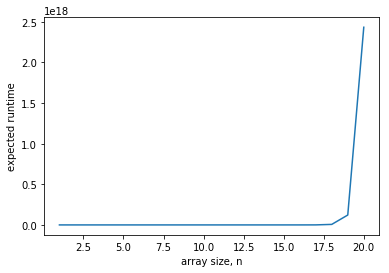

In [399]:
from scipy import misc
from matplotlib import pyplot as plt

x = np.array(range(1,21))
y = misc.factorial(x, exact=True)

print('n =', list(x))
print('n! =',list(y))

plt.plot(x,y)
plt.xlabel('array size, n')
plt.ylabel('expected runtime')
plt.show()


Given the horrendous runtime growth just for the first 15 input size, in general worst sort is a feasible method probably with very short lists of, say, length less than 10.

### [Optional] Question 1e.

Can you think of an even worse sorting method? In such a case, what would its complexity be? How big a list could you sort?

YOUR ANSWER HERE

## Question 2.
Approximate median finder. Given a list and δ (a number between 0 and 0.5), the approximate median finder function returns a number that is guaranteed to lie between the (50-δ/2)% and (50+δ/2)% percentiles. Implement such a function by randomly selecting an element from the list and testing whether or not it lies within the bounds. If it doesn’t then retry with a new random element, but only a limited number of retries are allowed (you decide the maximum number of retries.)

### Question 2a.
Complete the following function


In [400]:
import math

def check_approx_med(A, num, delta):
    """
    Given a list and a number in a list, determine 
    whether it is within (50-delta/2)% and 
    (50+delta/2)% percentiles.
    X% percentile of a list is defined to be the smallest number
    in the list that is as large as at least X% numbers in the list. 
    
    Input:
    - A: list of numerical values
    - num: the number of interest from the list A
    - delta: the error, lies between 0 and 0.5
    
    Output:
    - isApproxMed: a boolean value indicating 
    whether num is within the bound
    """

    assert 0 < delta < 0.5,  'delta must between 0 and 0.5'
    assert len(A)>0, 'input list can not be empty'
    
    n = len(A)
        # find the index of target percentile 
    if n < 2: 
        return False # makes no sense to find a median in a single number
  
    lwr_idx = math.ceil(n*(0.5-delta/2))-1  # take ceilings
    upr_idx = math.ceil(n*(0.5+delta/2))-1  # '-1' to convert count to array index
    A.sort()
    #print('A_sorted =',A)
    lwr_bound = A[lwr_idx] # the number at 0.5-delta/2%
    upr_bound = A[upr_idx] # the number at 0.5+delta/2%
    #print('bounds=', f"[{lwr_bound},{upr_bound}]")
    
    isWithinBound = (num >= lwr_bound and num <= upr_bound)
    return isWithinBound
    

    

In [401]:
A = list(range(1,20))
check_approx_med(A, 11, .1)

True

In [402]:
A = list(range(10,1,-1))
print(A)
num = 6
check_approx_med(A, num, delta)


[10, 9, 8, 7, 6, 5, 4, 3, 2]


True

In [403]:
# my test cases
A = list(range(10,1,-1))
B = [1,1,1,1,1]
C = list(range(10,1,-1))
assert(check_approx_med(A, 8, .1) == False)
assert(check_approx_med(B, 1, .1) == True)
assert(check_approx_med(C, 5, .2) == True)
assert(check_approx_med(C, 1, .3) == False)

In [404]:
assert(check_approx_med([0,1], 0, .25) == True)
assert(check_approx_med([0], 0, .25) == False)

### Question 2b.
Complete the following function that makes use of `check_approx_med` above.


In [405]:
import random

def approx_med_finder(A, delta):
    """
    Given a list, find a number in the list that is between
    50-delta/2% and 50+delta/2% percentiles
    
    Input:
    - A: list of numerical values
    - delta: the error, lies between 0 and 0.5
    
    Output:
    - num: the approximated median, if it is found within 100//delta trials (this is one possible 
    maximum number of retries. While you are encouraged to play around with another limits, the 
    submitted work must use this number.)
    - None: finding failed, if nothing found within 100//delta trials

    Note: the 100//delta is chosen here as it is the expected number of trials for the first successful finding to occur (using geometric distribution)
    """
    assert 0 < delta < 0.5,  'valid error size: 0 < delta < 0.5 '
    global tr # set a global trial counter for easy retrieval
    tr = 0

    k = int(100//delta)  # total number of trials

    for i in range(k): 
        tr += 1
        num = random.choice(A) #randomly draw a number from list A
        if check_approx_med(A, num, delta):
            return num
    # if none number is found within k trials, return None
    return None
    

In [406]:
# a case:
A = list(range(10,1,-1))
print(A)
delta = 0.05
random.choice(A)
median = approx_med_finder(A, delta)
print(f'median {median} is found on {tr} trial, delta = {delta}')

[10, 9, 8, 7, 6, 5, 4, 3, 2]
median 6 is found on 6 trial, delta = 0.05


### Question 2c.

What is the probability of failure in each random trial? What is the probability of failure after all the allowed random trials? Does this scale with δ or N (the number of elements in a list)?


    Analytically:
    for a sorted array of size N, the indices of delta error is denoted as lwr_idx, upr_idx, 
        [pseudo code]
        lwr_idx = ceiling(N*(0.5-delta/2)) 
        upr_idx = ceiling(N*(0.5+delta/2))
    the chance of randomly drawing a number within the median interval in a single trial would be:
    (upr_idx-lwr_idx) / N 
    = ceiling(N*(delta))/N ~= N(delta/1) = delta
    >>> Thus the probability of failure in each random trial is 1-delta.
    
      for a total number of k trials where k = 100// delta
    The chance fo failing k trials would be
        (1-delta)^k = (1-delta)^(100//delta)
    The probability of failure on the k+1 trial is again (1-delta), so the probability of failing AFTER all allowed random trials would be
    (1-delta)*(1-delta)^k = (1-delta)^(k+1)
    
    The probability should scale with delta, not N. 

### Question 2d.
Analyze the expected runtime of `approx_med_finder`. Note that because the function uses `check_approx_med`, you will most likely need to analyze the runtime of that function, too.

     Expected runtime for check_approx_med():
     1) calcutating lower and upper indices take constant time;
     2) A.sort() takes nlogn time;
     3) finding element of indices take constatn time
     4) assignment and boolean evaluation takes constant time
     overall, check_approx_med() expects runtime O(nlgn)
     
      Expected runtime for approx_med_finder() depends on how many times check_approx_med() is called. 
     Let X be the event that a number is returned within k=100//delta trials, and Xi be the indicator random variable of ith call for check_approx_med(), such that, if check_approx_med(), Xi=1, if check_approx_med() is false, Xi=0,
     from 2c, we know that the probability of a single trial being true is delta, so E(I{Xi}] = pr(Xi=1)*1+pr(Xi=0)*0 = pr(Xi=1) = delta.
     Next, the expected value of X is the sum of E(I{c}] for m trials m <=k such that all check_approx_med() but the last one evaluates to false. Thus, E[X] = E{sum_Xi] = sum(E(Xi)) = m*delta, for m <=k, and the expected runtime would be T(n) = m*delta*nlogn ~ O(nlogn)
     at m=k, k=100//delta, the upper bound is k*delta ~100, the algorithm at most run T(n) = 100*(nlogn)+c 

YOUR ANSWER HERE